In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy.stats as stats

print(np.version)

<module 'numpy.version' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\numpy\\version.py'>


In [2]:
# Time Series
"""
basically a set of data collected from a bigger set to represent the bigger set,collected at regular time intervals.
simply sated, sampling.
-Components of a time series:
    level : the  default value
    Trend : weather the data is increasing or decreasing
    Seasonality :
    Noise : the variability in the observations that cannot be explained
-Time series are of 2 types:
    1. Non Stationary time series : which is not stationary.
    2. Stationary time series 
        - It has:
            - constant mean
            - constant varience
            - constant covarience
        - A time series 'model' can only be generated using sttionary time series . for non stationary series, they are converted to stationary
          time series first using :
            - Detrending : removing the trend component from the series
            - Differencing: we model the differences of the terms and not the actual term.
            - Seasonality
        
- after making it stationary,  
            .... lots of theory .. duh
"""

a=5

In [4]:
filename= r'C:\Users\anshs\00ANSH_PYTHON\0_DATASETS and LARGE FILES\AirPassengers.csv'
dframe= pd.read_csv(filename)

In [5]:
dframe.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


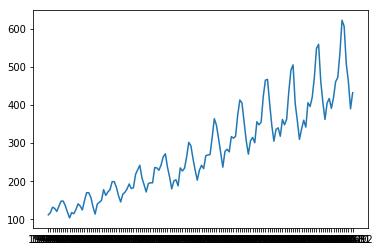

In [9]:
plt.plot(dframe.Month, dframe.AirPassengers)
# trend it is increasing with time
# is it stationary? we know a stationary data series has constant mean , covarience and varience lets find out


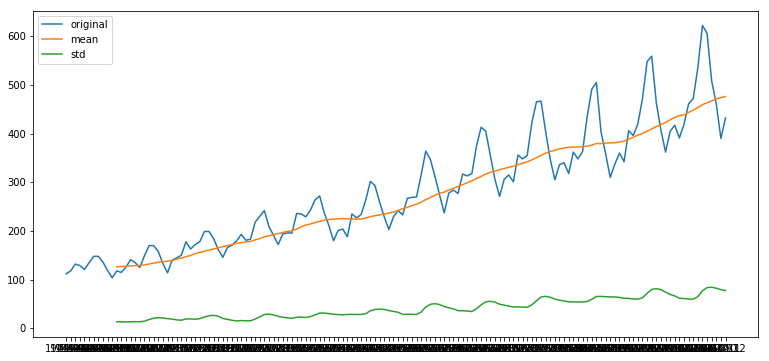

In [12]:
dynamic_mean = dframe.AirPassengers.rolling(window=12, center=False).mean()
dynamic_var = dframe.AirPassengers.rolling(window=12, center=False).var()
dynamic_std = dframe.AirPassengers.rolling(window=12, center=False).std()

fig = plt.subplots(figsize=[13, 6])

plt.plot(dframe.Month, dframe.AirPassengers, label='original')
plt.plot(dynamic_mean, label='mean')
# plt.plot(dynamic_var, label='variance')
plt.plot(dynamic_std, label='std')

plt.legend(loc='best')
# plt.plot(dynamic_mean)


"""
The dynamic mean/ var/std are rhe instant value of mean/var/std uptill that perticular second.
In the graph , it is clear that with increase in inputtsize, there is an increase in mean / std deviation /var.
this means mean/ var/std re not constant
thus its not a stationalry graph.
usually these increasing graphs are not stationary.
"""
x=5


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose  #importing a function


1      4.770685
2      4.882802
3      4.859812
4      4.795791
5      4.905275
6      4.997212
7      4.997212
8      4.912655
9      4.779123
10     4.644391
11     4.770685
12     4.744932
13     4.836282
14     4.948760
15     4.905275
16     4.828314
17     5.003946
18     5.135798
19     5.135798
20     5.062595
21     4.890349
22     4.736198
23     4.941642
24     4.976734
25     5.010635
26     5.181784
27     5.093750
28     5.147494
29     5.181784
30     5.293305
         ...   
113    6.075346
114    6.196444
115    6.224558
116    6.001415
117    5.883322
118    5.736572
119    5.820083
120    5.886104
121    5.834811
122    6.006353
123    5.981414
124    6.040255
125    6.156979
126    6.306275
127    6.326149
128    6.137727
129    6.008813
130    5.891644
131    6.003887
132    6.033086
133    5.968708
134    6.037871
135    6.133398
136    6.156979
137    6.282267
138    6.432940
139    6.406880
140    6.230481
141    6.133398
142    5.966147
Name: AirPassengers, Len

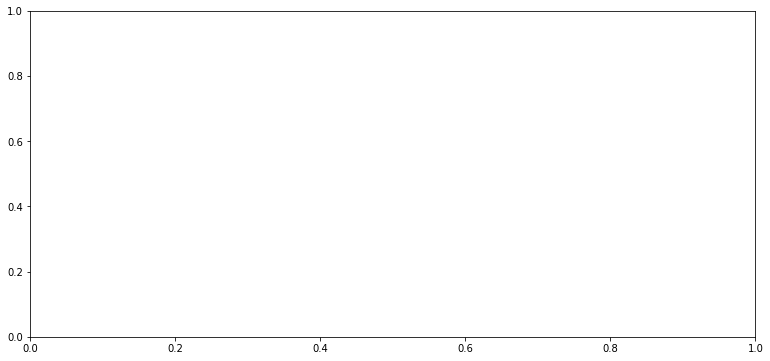

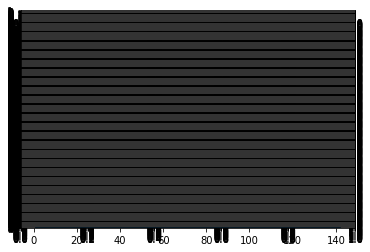

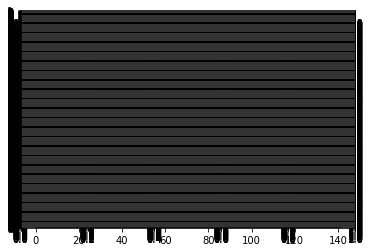

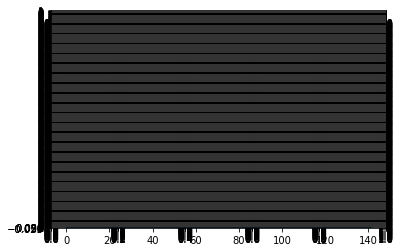

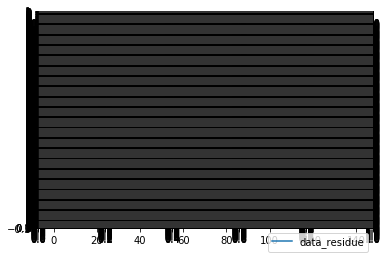

In [19]:
# making the data stationary.

data_log = np.log(dframe.AirPassengers)
decomposition = seasonal_decompose(np.asarray(data_log), freq=3)

data_trend = decomposition.trend
data_seasonality = decomposition.seasonal
data_residue = decomposition.resid

data_log=data_log[1:len(data_log)-1]
data_trend=data_trend[1:len(data_trend)-1]
data_residue=data_residue[1:len(data_residue)-1]
data_seasonality=data_seasonality[1:len(data_seasonality)-1]

print(data_log)
print("="*50)
print(data_trend)
print("="*50)
print(data_residue)
print("="*50)
print(data_seasonality)
print("="*50)


fig = plt.subplots(figsize=[13, 6])
plt.subplots(411)
plt.plot(data_log, label='original(log)')

plt.subplots(412)
plt.plot(data_trend, label='trend(log)')

plt.subplots(413)
plt.plot(data_seasonality, label='data_seasonality')

plt.subplots(414)
plt.plot(data_residue, label='data_residue')

plt.legend(loc='best')


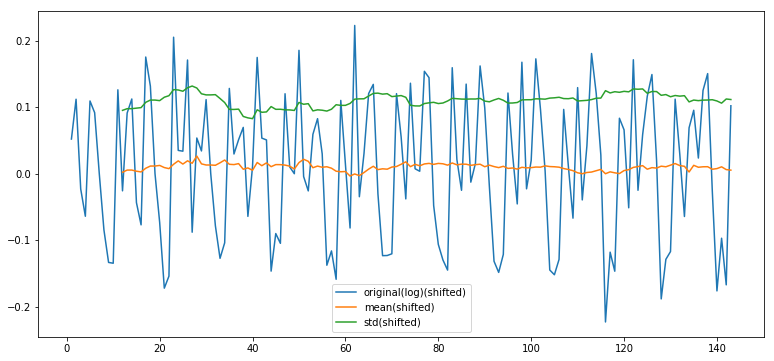

In [25]:
data_log = np.log(dframe.AirPassengers)
data_log_shifted =data_log -data_log.shift()
# plt.plot(data_log)
# plt.plot(data_log_shifted)

dynamic_mean_s = data_log_shifted.rolling(window=12, center=False).mean()
dynamic_var_s = data_log_shifted.rolling(window=12, center=False).var()
dynamic_std_s = data_log_shifted.rolling(window=12, center=False).std()

fig = plt.subplots(figsize=[13, 6])

plt.plot(data_log_shifted, label='original(log)(shifted)')
plt.plot(dynamic_mean_s, label='mean(shifted)')
# plt.plot(dynamic_var_s, label='variance(shifted)')
plt.plot(dynamic_std_s, label='std(shifted)')

plt.legend(loc='best')